#import

In [7]:
#!pip install --upgrade scikit-learn

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from scipy.optimize import fmin_tnc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#code

##model

In [10]:
class LogisticRegressionUsingGD:

    @staticmethod
    def sigmoid(x):
        # Activation function used to map any real value between 0 and 1
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def net_input(theta, x):
        # Computes the weighted sum of inputs Similar to Linear Regression
        return np.dot(x, theta)

    def probability(self, theta, x):
        # Calculates the probability that an instance belongs to a particular class
        return self.sigmoid(self.net_input(theta, x))

    def cost_function(self, theta, x, y):
        # Computes the cost function for all the training samples
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum(
            y * np.log(self.probability(theta, x)) + (1 - y) * np.log(
                1 - self.probability(theta, x)))
        return total_cost

    def gradient(self, theta, x, y):
        # Computes the gradient of the cost function at the point theta
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient,
                               args=(x, y.flatten()))
        self.w_ = opt_weights[0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

##dataset

In [11]:
def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


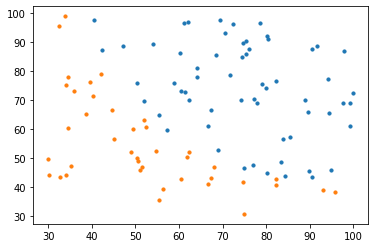

In [21]:
data = "https://raw.githubusercontent.com/AlexandroLuis/DataScience/main/Machine%20Leaning/Linear%20Regression/Logistic%20Regression/data.txt"
data = load_data(data, None)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10,label='Not Admitted')

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

model = LogisticRegressionUsingGD()
model.fit(X, y, theta)
accuracy = model.accuracy(X, y.flatten())
parameters = model.w_

##output

In [19]:
print("The accuracy of the model is {}".format(accuracy))
print("The model parameters using Gradient descent")
print("\n")
print(parameters)

The accuracy of the model is 89.0
The model parameters using Gradient descent


[-25.16131857   0.20623159   0.20147149]


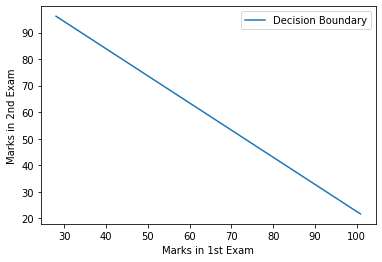

In [20]:
x_values = [np.min(X[:, 1] - 2), np.max(X[:, 2] + 2)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()

plt.show()

##scikit-learn

In [17]:
model = LogisticRegression()
model.fit(X, y)
parameters = model.coef_
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)

print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)

The accuracy score using scikit-learn is 0.89
The model parameters using scikit learn
[[-4.19885866e-08  2.05354461e-01  2.00583554e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
